In [1]:
#imports
import glob
import numpy as np
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
print("done")

done


In [2]:
# Load the dataset into variables
#----------------------------------------------------------------------

emails = [] # Mail texts
labels = [] # Labels(0 for ham, 1 for spam)

# Load ham mails
for filename in sorted(glob.glob('enron1/ham/*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
    labels.append(0)

# Load spam mails
for filename in sorted(glob.glob('enron1/spam/*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
    labels.append(1)

len(emails), len(labels) # Print out how much data we've loaded

(5172, 5172)

In [3]:
#Clean the texts
#----------------------------------------------------------------------

def letters_only(astr):
    return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(
            ' '.join([lemmatizer.lemmatize(word.lower())
                     for word in doc.split()
                         if letters_only(word)
                              and word not in all_names]))
    return cleaned_docs
            
cleaned_emails = clean_text(emails)

In [4]:
# First email before cleaning
emails[0]

'Subject: christmas tree farm pictures\n'

In [5]:
# First email after cleaning
cleaned_emails[0]

'christmas tree farm picture'

In [6]:
# Split the dataset into train dataset and test dataset
#----------------------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)

In [7]:
# Remove unused words and convert the dataset into a Document-Term Matrix
#----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=500) # the input text is in English, consider most frequent 500 words only
term_docs_train = cv.fit_transform(X_train)
term_docs_test = cv.transform(X_test)

Model accuracy =  0.9197422378441711
Confusion Matrix 
 [[1140   89]
 [  48  430]]


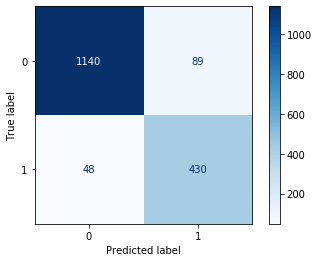

In [31]:
# Applying the machine learning with a MultinomialNB object
#  Naive Bayes model and print out the model accuracy with the test dataset

model=MultinomialNB().fit(term_docs_train,Y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt  
predict=model.predict(term_docs_test)

#print(classification_report(predict,Y_test))
print("Model accuracy = ",model.score(term_docs_test,Y_test))
print("Confusion Matrix \n",confusion_matrix(Y_test,predict))
plot_confusion_matrix(model,term_docs_test,Y_test,cmap=plt.cm.Blues,values_format = '')
plt.show()